In [2]:
import matplotlib.pyplot as plt
import numpy as np
import colors

# Set matplotlib font to resemble LaTeX's default font (Computer Modern)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

# Making text bolder
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

In [3]:
orange = ["#ffac00"]
darkorange = ["#662089"]
blue = ["#1B4882"]
green = ["#086361"]
darkgreen = ["#2c853c"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        darkorange.append(colors.get_alpha_hex(darkorange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        darkgreen.append(colors.get_alpha_hex(darkgreen[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

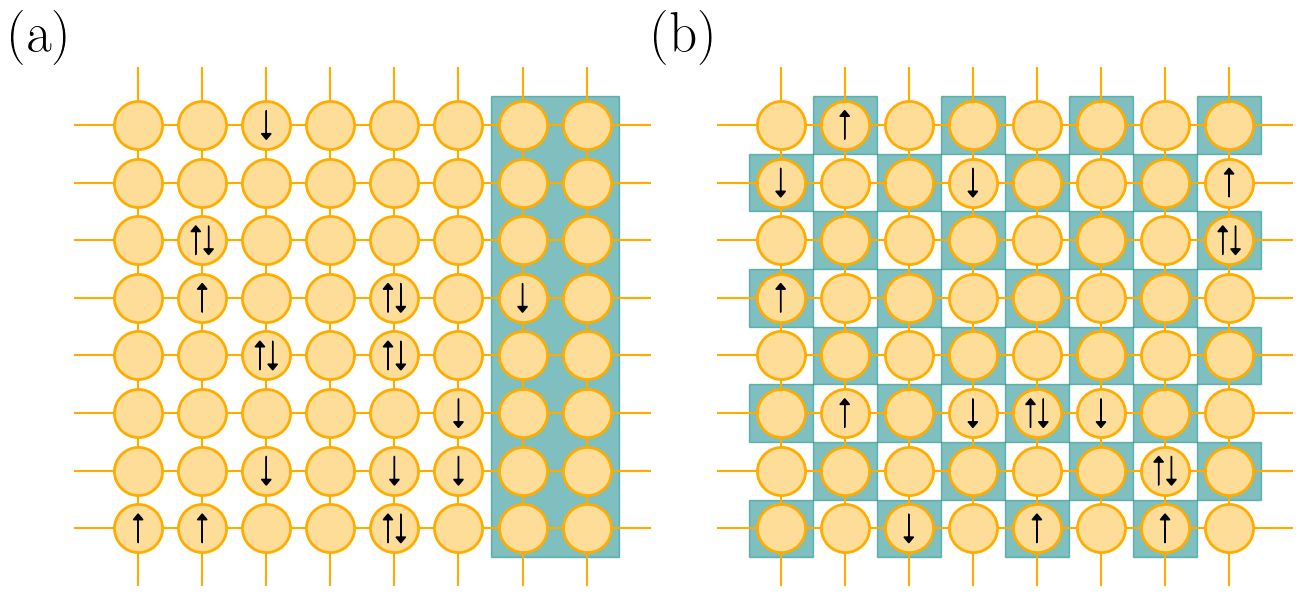

In [6]:
#fig, (ax1, ax2, ax3)= plt.subplots(1, 3, figsize=(19, 6))
fig, (ax1, ax3)= plt.subplots(1, 2, figsize=(13, 6))

# Size of the lattice
size = 8

# Define arrow properties
arrow_length = 0.4
arrow_width = 0.05
arrow_head_width = 0.15
arrow_head_length = 0.1

#for ax in (ax1, ax2, ax3):
for ax in (ax1, ax3):
    # Drawing the edges connecting vertices
    for i in range(size):
        for j in range(size):
            # horizontal lines
            ax.plot([i, i + 1], [j, j], color=orange[0])
            # vertical lines
            ax.plot([i, i], [j, j + 1], color=orange[0])

    # Add the stretched out edges for periodic boundary conditions
    for i in range(size):
        ax.plot([-1.0, 0], [i, i], color=orange[0])  # left edge
        ax.plot([size-0.5, size], [i, i], color=orange[0])  # right edge
        ax.plot([i, i], [-1.0, 0], color=orange[0])  # bottom edge
        ax.plot([i, i], [size-0.5, size], color=orange[0])  # top edge

    # Plotting each vertex as an opaque circle and random arrow or two separate arrows
    for i in range(size):
        for j in range(size):
            ax.scatter(i, j, s=1200, color=orange[4], edgecolors=orange[0], linewidth=2, zorder=2)

            # Decide if the site will have one arrow, two arrows, or none
            choice = np.random.choice(['up', 'down', 'double', 'none'], p=[0.1, 0.1, 0.1, 0.7])

            if choice == 'up':
                ax.arrow(i, j-0.25, 0, arrow_length, 
                         head_width=arrow_head_width, head_length=arrow_head_length, fc='k', ec='k', zorder=3)
            elif choice == 'down':
                ax.arrow(i, j+0.25, 0, -arrow_length, 
                         head_width=arrow_head_width, head_length=arrow_head_length, fc='k', ec='k', zorder=3)
            elif choice == 'double':
                ax.arrow(i - arrow_width*2, j-0.25, 0, arrow_length, 
                         head_width=arrow_head_width, head_length=arrow_head_length, fc='k', ec='k', zorder=3)
                ax.arrow(i + arrow_width*2, j+0.25, 0, -arrow_length, 
                         head_width=arrow_head_width, head_length=arrow_head_length, fc='k', ec='k', zorder=3)
    
    # Adjusting the visible area to show stretched out edges
    ax.set_xlim(-1, size)
    ax.set_ylim(-1, size)

    # Remove axis labels and ticks
    ax.axis('off')

# Shading the lattice to indicate bipartition
# 8*2 partition
rectangle1 = plt.Rectangle((5.5, -0.5), size/4, size, color='#008080', alpha=0.5, zorder=1)
ax1.add_patch(rectangle1)

# 8*4 partition
#rectangle2 = plt.Rectangle((3.5, -0.5), size/2, size, color='#008080', alpha=0.5, zorder=1)
#ax2.add_patch(rectangle2)

# Checkerboard shading
for i in range(size):
    for j in range(size):
        if (i + j) % 2 == 0:
            rect = plt.Rectangle((j-0.5, i-0.5), 1, 1, color='#008080', alpha=0.5)
            ax3.add_patch(rect)

# Adding labels
label_parameters = {'fontsize':40, 'verticalalignment':'top'}
ax1.text(-2, 9, '(a)', **label_parameters)
#ax2.text(-2, 9, '(b)', **label_parameters)
ax3.text(-2, 9, '(b)', **label_parameters)
#ax3.text(-2, 9, '(c)', **label_parameters)

plt.tight_layout()
plt.show()

In [12]:
fig.savefig("../figures/PartitionFigures.pdf")
fig.savefig("../figures/PartitionFigures.svg")